<a href="https://colab.research.google.com/github/guilhermelaviola/MyMusic/blob/main/MyMusic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
sns.set(style = 'whitegrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'My Music.xlsx'
search_path = '/content/drive/My Drive/Datasets/Music'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read.excel(file)

# **Basic information of the dataset**



In [3]:
# Importing the main dataset and displaying the last 10 rows:
df = pd.ExcelFile(file)
music = pd.read_excel(df, 'Songs')
music.tail()

,Name,Pitch,Genre,Created
109,Dusty,Em,Undefined,2023-08-03 00:00:00
110,Piano Beat,E,Undefined,2016-09-07 00:00:00
111,San Juan,Am (Phrygian),Undefined,29/1/2021
112,Spiral,F#m (Dorian),Undefined,2020-12-10 00:00:00
113,Sweet melody,F,Undefined,22/12/2024


In [4]:
# Displaying the number of rows and columns in the dataset:
music.shape

(114, 4)

In [5]:
# Displaying the datatypes of each column:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     114 non-null    object
 1   Pitch    114 non-null    object
 2   Genre    114 non-null    object
 3   Created  114 non-null    object
dtypes: object(4)
memory usage: 3.7+ KB


# **Basic column data plotting**

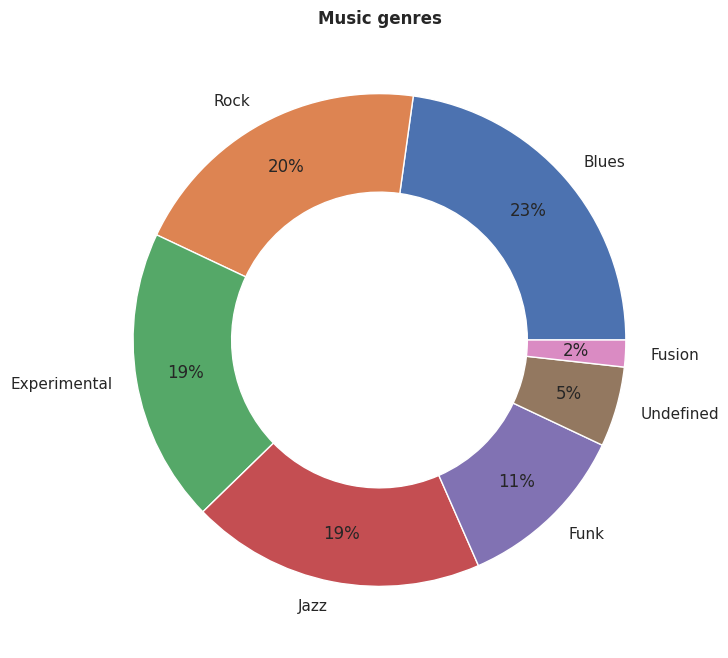

In [6]:
# Displaying the music genres present in the dataset:
music['Genre'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Music genres', fontweight = 'bold')
plt.show()

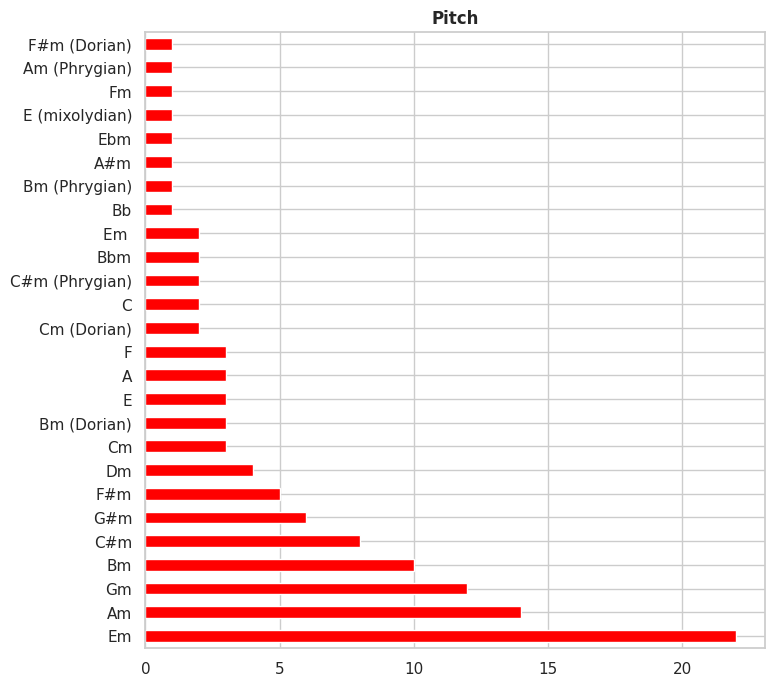

In [15]:
# Displaying the pitches present in the dataset:
music['Pitch'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 8))
plt.ylabel(None)
plt.title('Pitch', fontweight = 'bold')
plt.show()

In [8]:
# Creating a datetime object based on the dates from the dataset:
music['Created'] = music['Created'].map(pd.to_datetime)
music['Day created'] = music['Created'].apply(lambda x : x.day)
music['Month created'] = music['Created'].apply(lambda x : x.month)
music['Year created'] = music['Created'].apply(lambda x : x.year)
music['Weekday created'] = music['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             114 non-null    object        
 1   Pitch            114 non-null    object        
 2   Genre            114 non-null    object        
 3   Created          114 non-null    datetime64[ns]
 4   Day created      114 non-null    int64         
 5   Month created    114 non-null    int64         
 6   Year created     114 non-null    int64         
 7   Weekday created  114 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 7.2+ KB


<ipython-input-8-111c6a1b5991>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  music['Created'] = music['Created'].map(pd.to_datetime)


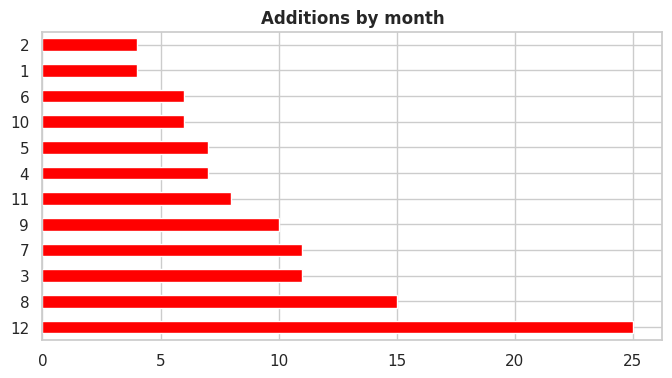

In [9]:
# Displaying the months with most and less additions:
music['Month created'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

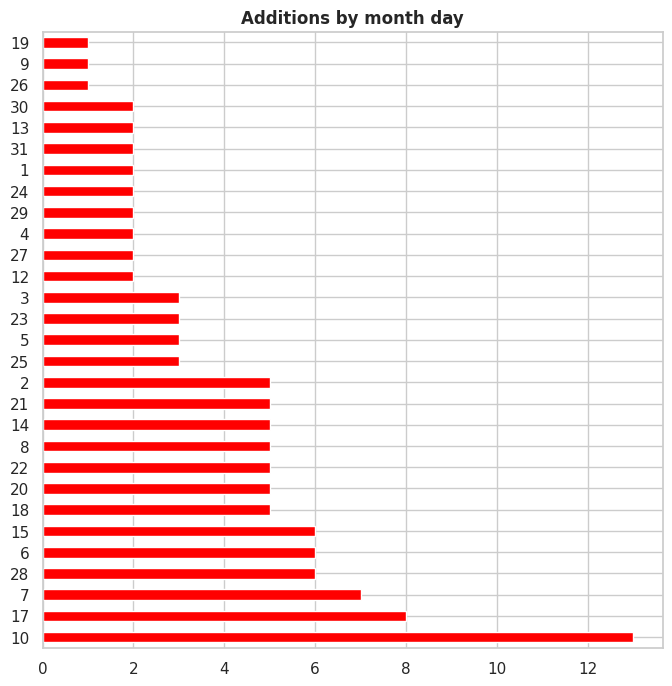

In [10]:
# Displaying the month days with most and less additions:
music['Day created'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

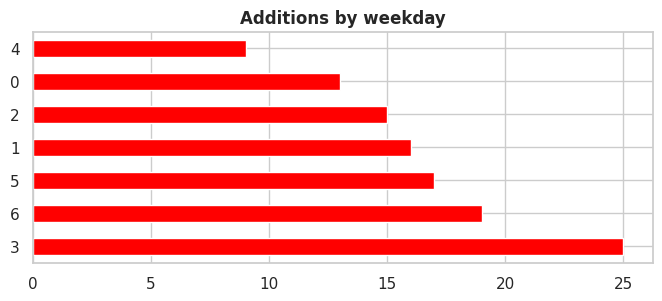

In [11]:
# Displaying the weekdays with most and less additions:
music['Weekday created'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

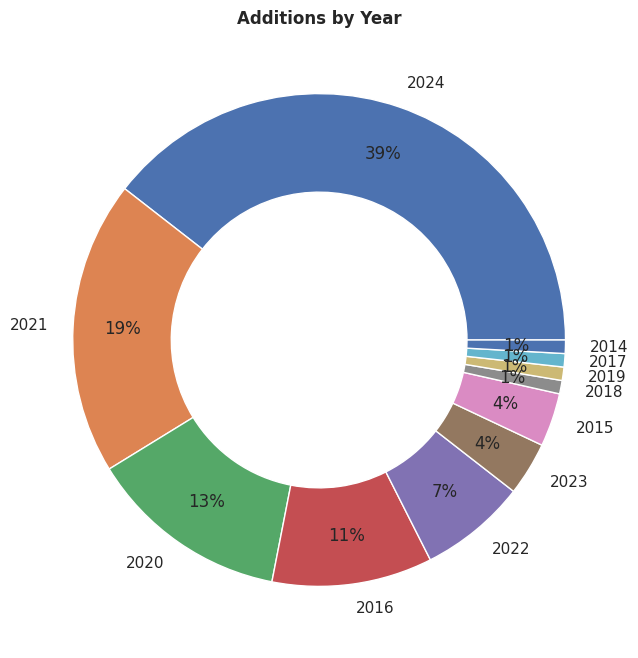

In [12]:
# Displaying the years with most and less additions:
music['Year created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()